In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('/food_order.csv', encoding='latin-1')
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


##Missing Values

In [ ]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

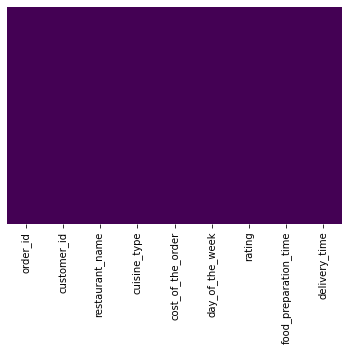

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df.rating.value_counts(1)

Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64

In [ ]:
day_delivery = df[["delivery_time", "day_of_the_week"]].groupby("day_of_the_week").mean()
print(day_delivery)

                 delivery_time
day_of_the_week               
Weekday              28.340037
Weekend              22.470022


The average delivery time is low on weekends.

In [ ]:
preparation_time = df[["food_preparation_time", "day_of_the_week"]].groupby("day_of_the_week").mean()
print(preparation_time)

                 food_preparation_time
day_of_the_week                       
Weekday                      27.212066
Weekend                      27.436714


The average food preparation is almost same on weekdays and weekends.

To find the ratings of the restaurants based on the cuisine. First remove the restaurants whose rating is not given. Plot remaining restaurants based on their ratings and cuisine type.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

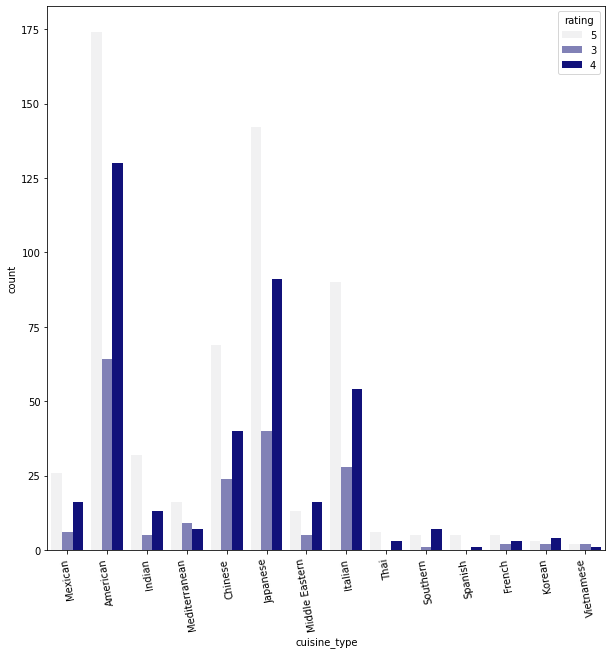

In [ ]:
df_s = df[df['rating'] != 'Not given']

plt.figure(figsize = (10,10))
x = sns.countplot(x = 'cuisine_type', hue = 'rating', data = df_s, color = 'darkblue')
plt.xticks(rotation = 100)

From the above plot,American,Japanese and Italian restaurants have maximum number of high ratings. 

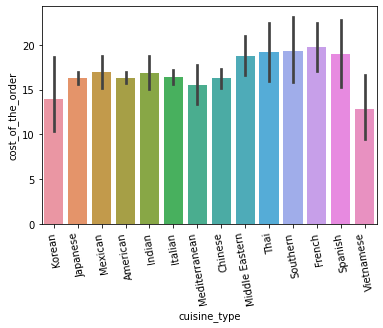

In [ ]:
chart = sns.barplot(x = 'cuisine_type', y = 'cost_of_the_order',data = df)
plt.xticks(rotation = 100)
plt.show()

In [ ]:
df.shape

(1898, 9)

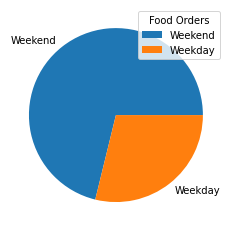

In [ ]:
y = np.array(df["day_of_the_week"].value_counts())


ylabels = ["Weekend", "Weekday"]
plt.pie(y, labels = ylabels)
plt.legend(title = "Food Orders")
plt.show() 

There are more food orders on weekends than weekdays.